In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [ ]:
np.random.seed(42)
x = np.random.rand(100,1) - 0.5 ## 100 row between 0 - 0.5
y = 3 * x[:,0]**2 + 0.05 * np.random.randn(100)

In [3]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [4]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [8]:
df = pd.DataFrame()
df['x'] = x.reshape(100)
df['y'] = y

In [9]:
df.head(3)

x         y
0 -0.125460  0.051573
1  0.450714  0.594480
2  0.231994  0.166052

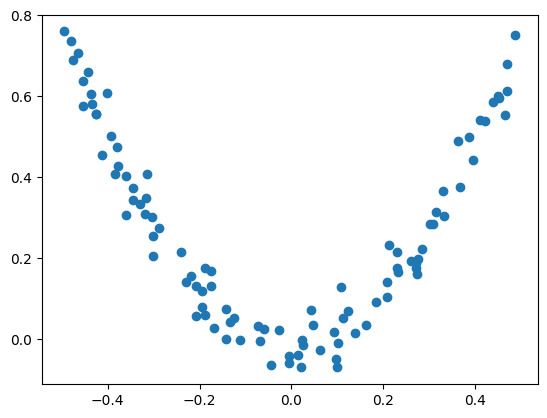

In [10]:
plt.scatter(x = df['x'], y = df['y'])

In [11]:
df['pred1'] = df['y'].mean()

In [12]:
df

x         y     pred1
0  -0.125460  0.051573  0.265458
1   0.450714  0.594480  0.265458
2   0.231994  0.166052  0.265458
3   0.098658 -0.070178  0.265458
4  -0.343981  0.343986  0.265458
..       ...       ...       ...
95 -0.006204 -0.040675  0.265458
96  0.022733 -0.002305  0.265458
97 -0.072459  0.032809  0.265458
98 -0.474581  0.689516  0.265458
99 -0.392109  0.502607  0.265458

[100 rows x 3 columns]

In [13]:
df['res1'] = df['y'] - df['pred1']

In [14]:
df

x         y     pred1      res1
0  -0.125460  0.051573  0.265458 -0.213885
1   0.450714  0.594480  0.265458  0.329021
2   0.231994  0.166052  0.265458 -0.099407
3   0.098658 -0.070178  0.265458 -0.335636
4  -0.343981  0.343986  0.265458  0.078528
..       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133
96  0.022733 -0.002305  0.265458 -0.267763
97 -0.072459  0.032809  0.265458 -0.232650
98 -0.474581  0.689516  0.265458  0.424057
99 -0.392109  0.502607  0.265458  0.237148

[100 rows x 4 columns]

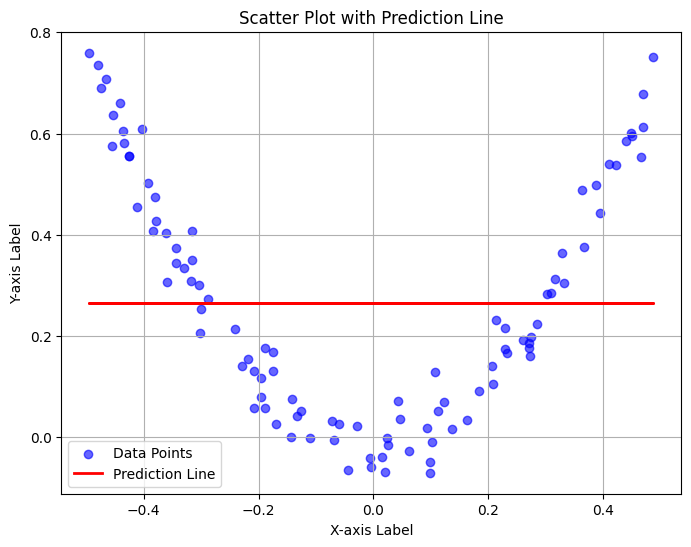

In [19]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Optional: Adjust figure size

plt.scatter(df['x'], df['y'], label='Data Points', color='blue', alpha=0.6)
plt.plot(df['x'], df['pred1'], color='red', label='Prediction Line', linewidth=2)

plt.xlabel('X-axis Label')  # Customize as needed
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Prediction Line')
plt.legend()
plt.grid(True)  # Adds a grid for better readability
plt.show()

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
tree1.fit(df['x'].values.reshape(100,1),df['res1'].values)


DecisionTreeRegressor(max_leaf_nodes=8)

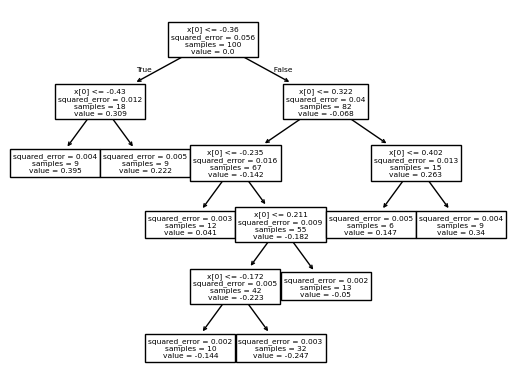

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [25]:
x_test = np.linspace(-0.5,0.5,500)

In [26]:
y_pred = 0.265458 + tree1.predict(x_test.reshape(500,1))

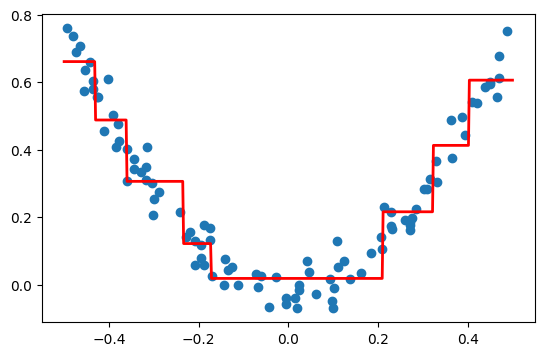

In [27]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred,linewidth= 2, color = 'red')
plt.scatter(x = df['x'], y =  df['y'])

In [28]:
df['pred2'] = 0.265458 + tree1.predict(df['x'].values.reshape(100,1))

In [29]:
df

x         y     pred1      res1     pred2
0  -0.125460  0.051573  0.265458 -0.213885  0.018319
1   0.450714  0.594480  0.265458  0.329021  0.605884
2   0.231994  0.166052  0.265458 -0.099407  0.215784
3   0.098658 -0.070178  0.265458 -0.335636  0.018319
4  -0.343981  0.343986  0.265458  0.078528  0.305964
..       ...       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133  0.018319
96  0.022733 -0.002305  0.265458 -0.267763  0.018319
97 -0.072459  0.032809  0.265458 -0.232650  0.018319
98 -0.474581  0.689516  0.265458  0.424057  0.660912
99 -0.392109  0.502607  0.265458  0.237148  0.487796

[100 rows x 5 columns]

In [30]:
df['res2'] = df['y'] - df['pred2']

In [31]:
df

x         y     pred1      res1     pred2      res2
0  -0.125460  0.051573  0.265458 -0.213885  0.018319  0.033254
1   0.450714  0.594480  0.265458  0.329021  0.605884 -0.011404
2   0.231994  0.166052  0.265458 -0.099407  0.215784 -0.049732
3   0.098658 -0.070178  0.265458 -0.335636  0.018319 -0.088497
4  -0.343981  0.343986  0.265458  0.078528  0.305964  0.038022
..       ...       ...       ...       ...       ...       ...
95 -0.006204 -0.040675  0.265458 -0.306133  0.018319 -0.058994
96  0.022733 -0.002305  0.265458 -0.267763  0.018319 -0.020624
97 -0.072459  0.032809  0.265458 -0.232650  0.018319  0.014489
98 -0.474581  0.689516  0.265458  0.424057  0.660912  0.028604
99 -0.392109  0.502607  0.265458  0.237148  0.487796  0.014810

[100 rows x 6 columns]

In [33]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)


In [35]:
tree2.fit(df['x'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [36]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [tree1,tree2])


Text(0.5, 1.0, 'X vs y')

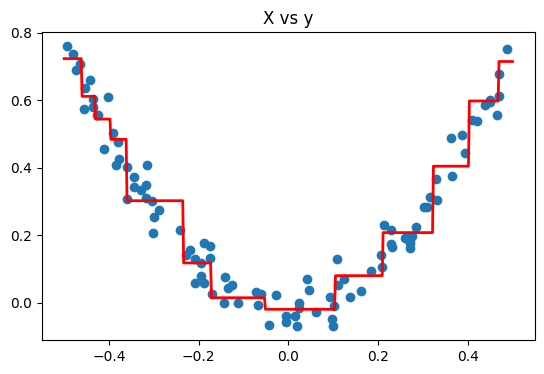

In [38]:

plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2,color='red')
plt.scatter(df['x'],df['y'])
plt.title('X vs y')

In [41]:
def gradient_boost(X,y,number,lr,count=1,regs=[],foo=None):

  if number == 0:
    return 
  else:
    # do gradient boosting

    if count > 1:
      y = y - regs[-1].predict(X)
    else:
      foo = y

    tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_reg.fit(X, y)

    regs.append(tree_reg)

    x1 = np.linspace(-0.5, 0.5, 500)
    y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)

    print(number)
    plt.figure()
    plt.plot(x1, y_pred, linewidth=2)
    plt.plot(X[:, 0], foo,"r.")
    plt.show()

    gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


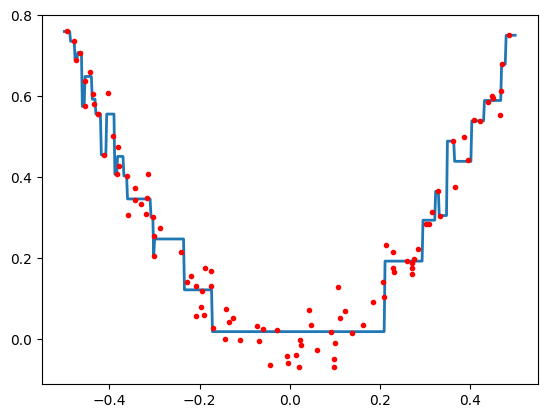

4


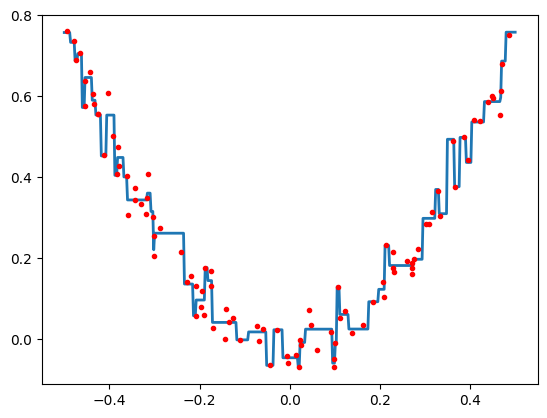

3


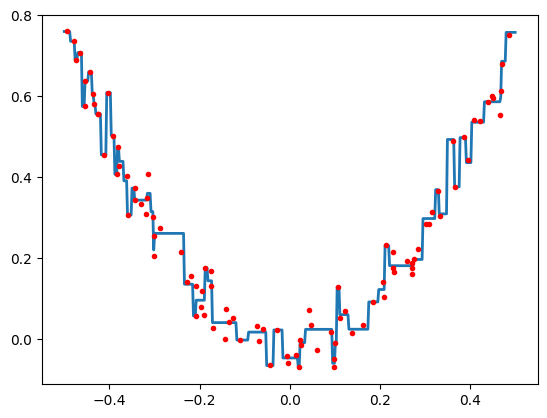

2


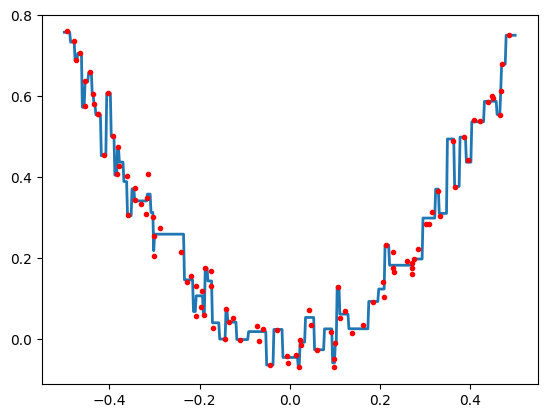

1


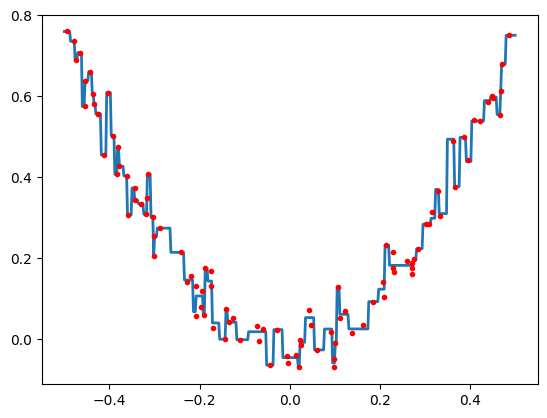

In [42]:

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y,5,lr=1)